In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

C:\Users\NIHIT\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Generic classification and optimization functions from last lab
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# clf - original classifier
# parameters - grid to search over
# X - usually your training X matrix
# y - usually your training y 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
# indf - Input dataframe
# featurenames - vector of names of predictors
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# mask - boolean vector indicating test set (~mask is training set)
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Plot tree containing only two covariates
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clfTree1.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)

C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


(array([  10.,    0.,   53.,    0.,  681.,    0.,  638.,    0.,  199.,   18.]),
 array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ]),
 <a list of 10 Patch objects>)

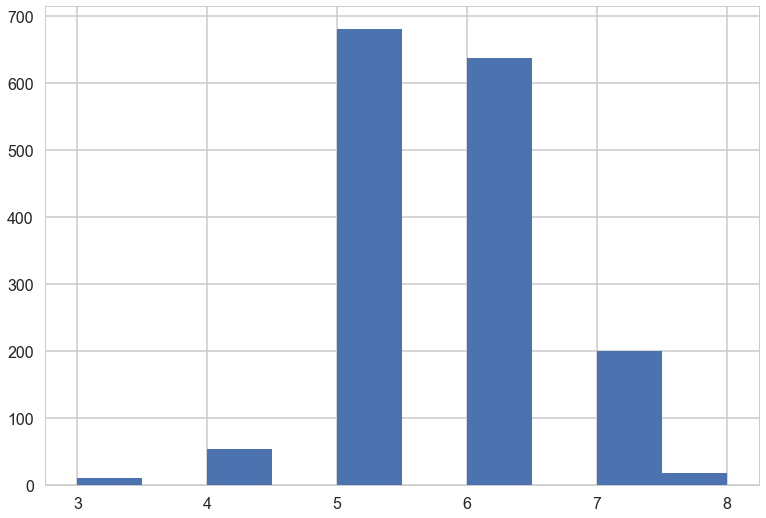

In [4]:
print df.shape

plt.hist(df.quality)

We will use the quality column as our target variable. Except that we will simplify the problem to a binary world in which wines are either "bad" $(score<7)$ or "good" $(score>=7)$. For example, if originally $Y = [1,3,8,4,7]$, the new $Y$ should be $[0,0,1,0,1]$.

In [5]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

In [6]:
Xnames = list(df.columns.values[1:11])

# Evaluation Metrics

First, notice that we're actually dealing with a relatively small number of good wines in out dataset.

In [7]:
np.mean(df['target'])

0.1357098186366479

 Decision trees can be use for regression (prediction of continuous outcomes) as well.

In [8]:
# Create test/train mask
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
mask

array([ True, False,  True, ...,  True, False, False], dtype=bool)

In [9]:
# make sure we didn't get unlucky in our mask selection
print "% Good wines in Training:", np.mean(df.target[mask])
print "% Good wines in Testing:", np.mean(df.target[~mask])

% Good wines in Training: 0.137643378519
% Good wines in Testing: 0.1328125


###### fit a decision tree

Let's first fit on two covariates to help us visualize what's going on. Have a look at the options on the help page. We'll be optimizing over two options here: max_depth - the maximum depth of the tree, min_samples_leaf - the minimum number of samples required to be at a leaf node.

In [10]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df,['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'max_depth': 5, 'min_samples_leaf': 5} 0.344589179055 [mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 1}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 2}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 3}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 4}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 5}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 6}, mean: 0.15605, std: 0.19100, params: {'max_depth': 2, 'min_samples_leaf': 1}, mean: 0.15605, std: 0.19100, params: {'max_depth': 2, 'min_samples_leaf': 2}, mean: 0.15605, std: 0.19100, params: {'max_depth': 2, 'min_samples_leaf': 3}, mean: 0.15605, std: 0.19100, params: {'max_depth': 2, 'min_samples_leaf': 4}, mean: 0.15605, std: 0.19100, params: {'max_depth': 2, 'min_samples_leaf': 5}, mean: 0.15605, std: 0.19100, params: {'max_depth': 2, 'min_samples_lea

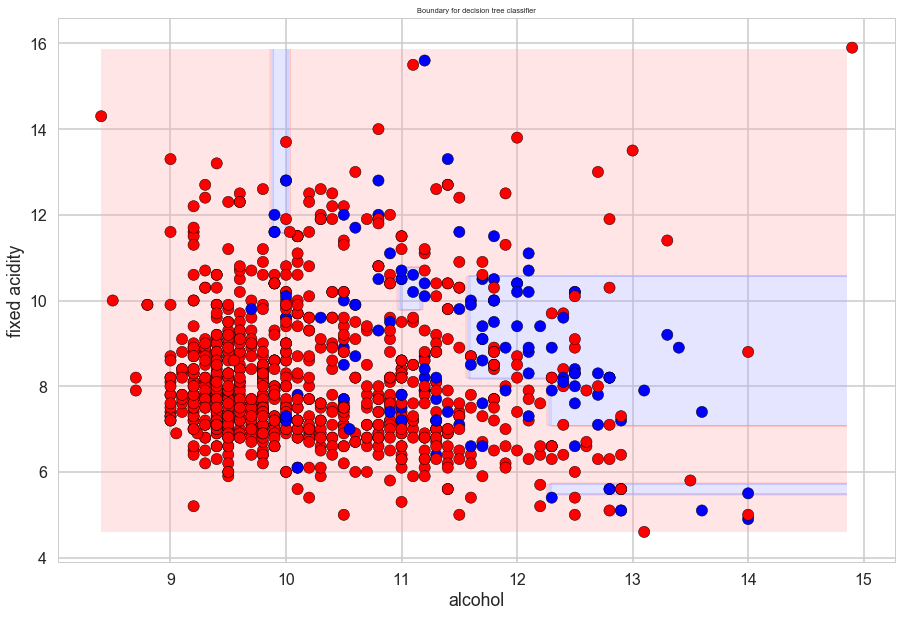

In [11]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1,lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

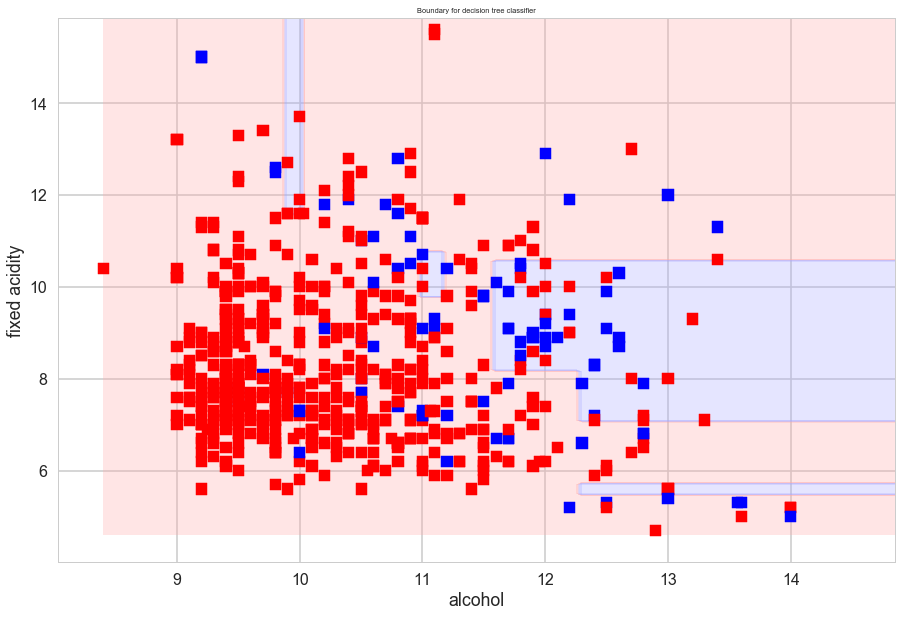

In [12]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1,lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'max_depth': None, 'min_samples_leaf': 4} 0.284304560426 [mean: 0.28430, std: 0.09913, params: {'max_depth': None, 'min_samples_leaf': 4}, mean: 0.28269, std: 0.15039, params: {'max_depth': None, 'min_samples_leaf': 5}, mean: 0.28421, std: 0.05640, params: {'max_depth': None, 'min_samples_leaf': 6}]
############# based on standard predict ################
Accuracy on training data: 0.91
Accuracy on test data:     0.86
[[527  28]
 [ 61  24]]
########################################################


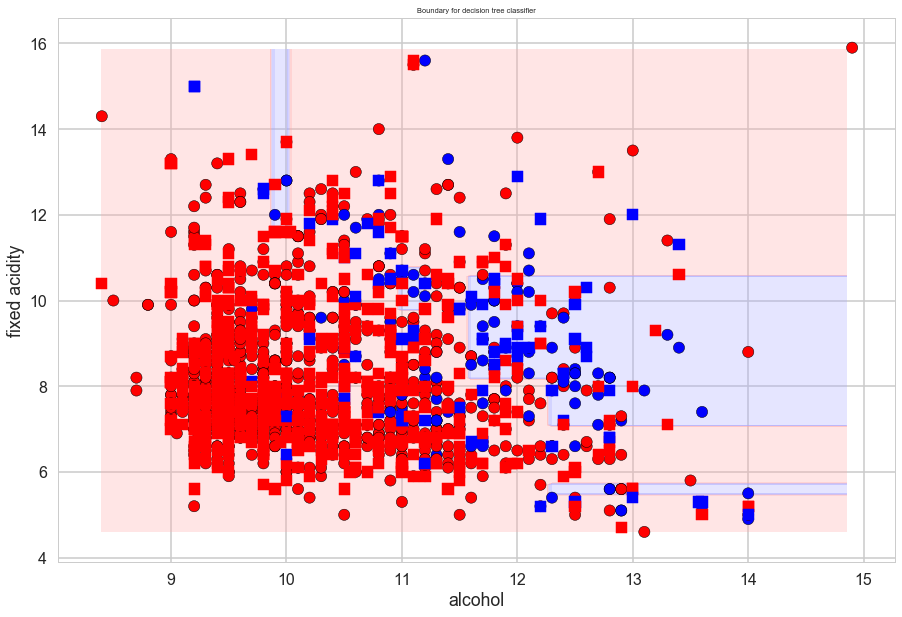

In [13]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df,['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp,lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [14]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, Xnames,'target', 1,mask=mask, n_jobs = 4, score_func = 'f1')

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'max_depth': 2, 'min_samples_leaf': 1} 0.471479948652 [mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 1}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 2}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 3}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 4}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 5}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 6}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 7}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 8}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 9}, mean: 0.00000, std: 0.00000, params: {'max_depth': 1, 'min_samples_leaf': 10}, mean: 0.47148, std: 0.04923, params: {'max_depth': 2, 'min_samples_leaf': 1}, mean: 0.47148, std: 0.04923, params: {'max_depth': 2, 'min_samples_le

#### Random Forests

The random forest technique works by aggregating the results from a number of randomly perturbed decision trees constructed to explain the data.

In [15]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'n_estimators': 7} 0.450204745055 [mean: 0.32189, std: 0.05000, params: {'n_estimators': 1}, mean: 0.21713, std: 0.06590, params: {'n_estimators': 2}, mean: 0.41745, std: 0.09553, params: {'n_estimators': 3}, mean: 0.30891, std: 0.12333, params: {'n_estimators': 4}, mean: 0.41009, std: 0.06665, params: {'n_estimators': 5}, mean: 0.28986, std: 0.10363, params: {'n_estimators': 6}, mean: 0.45020, std: 0.06476, params: {'n_estimators': 7}, mean: 0.33269, std: 0.11406, params: {'n_estimators': 8}, mean: 0.38369, std: 0.08786, params: {'n_estimators': 9}, mean: 0.34674, std: 0.07068, params: {'n_estimators': 10}, mean: 0.38030, std: 0.07735, params: {'n_estimators': 11}, mean: 0.36392, std: 0.12788, params: {'n_estimators': 12}, mean: 0.30874, std: 0.13322, params: {'n_estimators': 13}, mean: 0.36059, std: 0.07459, params: {'n_estimators': 14}, mean: 0.34166, std: 0.08594, params: {'n_estimators': 15}, mean: 0.37111, std: 0.06150, params: {'n_estimators': 16}, mean: 0.37594

### Relative Importance

We can get a measure of how important a variable is from a random forest, it's essentially a measure of how well each particular variable is able to predict well when it is selected

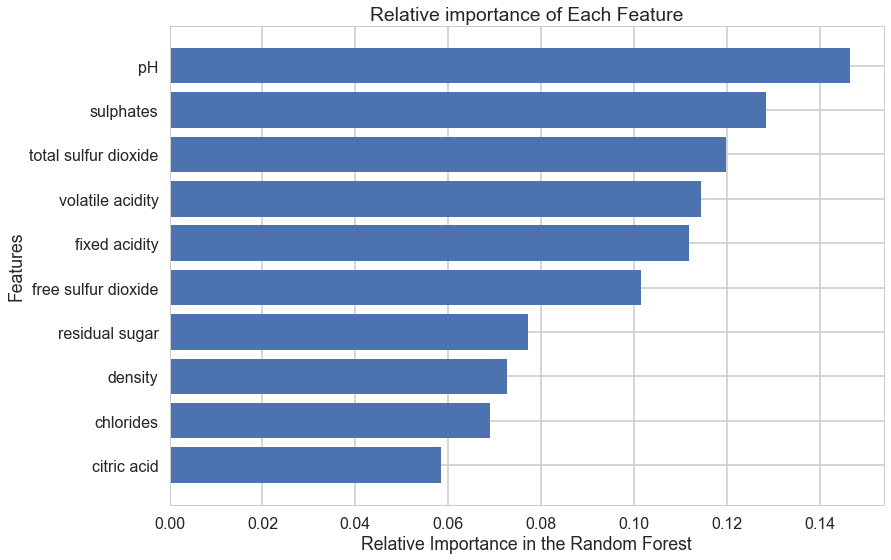

In [16]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [17]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters,df, Xnames, 'target', 1, mask=mask,n_jobs = 4, score_func='f1') 
                                                       

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'n_estimators': 11} 0.421027728256 [mean: 0.41027, std: 0.07627, params: {'n_estimators': 10}, mean: 0.42103, std: 0.06442, params: {'n_estimators': 11}, mean: 0.37022, std: 0.09454, params: {'n_estimators': 12}, mean: 0.41448, std: 0.08164, params: {'n_estimators': 13}, mean: 0.39518, std: 0.06150, params: {'n_estimators': 14}, mean: 0.39365, std: 0.05185, params: {'n_estimators': 15}, mean: 0.38546, std: 0.06896, params: {'n_estimators': 16}, mean: 0.38325, std: 0.08280, params: {'n_estimators': 17}, mean: 0.38699, std: 0.07804, params: {'n_estimators': 18}, mean: 0.38386, std: 0.07918, params: {'n_estimators': 19}, mean: 0.37393, std: 0.07558, params: {'n_estimators': 20}, mean: 0.38150, std: 0.07381, params: {'n_estimators': 21}, mean: 0.38386, std: 0.07797, params: {'n_estimators': 22}, mean: 0.37660, std: 0.08708, params: {'n_estimators': 23}, mean: 0.37577, std: 0.08527, params: {'n_estimators': 24}, mean: 0.36884, std: 0.08104, params: {'n_estimators': 25}, mea

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, df, Xnames, 'target', 1, mask=mask, n_jobs = 4, score_func='f1')                               

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'n_estimators': 34, 'max_depth': 4} 0.445046818052 [mean: 0.18369, std: 0.16096, params: {'n_estimators': 30, 'max_depth': 1}, mean: 0.25019, std: 0.13995, params: {'n_estimators': 31, 'max_depth': 1}, mean: 0.24842, std: 0.13833, params: {'n_estimators': 32, 'max_depth': 1}, mean: 0.24842, std: 0.13833, params: {'n_estimators': 33, 'max_depth': 1}, mean: 0.24662, std: 0.13694, params: {'n_estimators': 34, 'max_depth': 1}, mean: 0.24490, std: 0.13569, params: {'n_estimators': 35, 'max_depth': 1}, mean: 0.25285, std: 0.14207, params: {'n_estimators': 36, 'max_depth': 1}, mean: 0.25285, std: 0.14207, params: {'n_estimators': 37, 'max_depth': 1}, mean: 0.28818, std: 0.10488, params: {'n_estimators': 38, 'max_depth': 1}, mean: 0.27892, std: 0.09468, params: {'n_estimators': 39, 'max_depth': 1}, mean: 0.28061, std: 0.09624, params: {'n_estimators': 40, 'max_depth': 1}, mean: 0.29079, std: 0.10164, params: {'n_estimators': 41, 'max_depth': 1}, mean: 0.28911, std: 0.10034, pa

## Visualizing Surfaces using decision surfaces

Using this function and the results from the "importance" analysis above, subset the data matrix to include just the two features of highest importance. Then plot the decision surfaces of a decision tree classifier, and a random forest classifier with number of trees set to 15, and a support vector machine with C set to 100, and gamma set to 1.0.

In [19]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
# your code here
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

In [20]:
X_imp = df[imp_cols].values
Y = df.target.values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in xrange(4):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)

KeyError: '[8 9] not in index'